# 8.

### Leer la subseccion Prunning y explique con sus palabras como se eliminan las ramificaciones no deseadas de un objeto binario mediante operaciones morfologicas.

### Aplicar estas ideas para remover las ramificaciones no deseadas del esqueleto en el ejercicio anterior

La operación de prunning elimina pequeñas ramas del esqueleto que pueden aparecer debido a ruidos o detalles no relevantes. Se logra mediante una combinación de apertura morfológica con esqueletización y filtrado de segmentos cortos del esqueleto

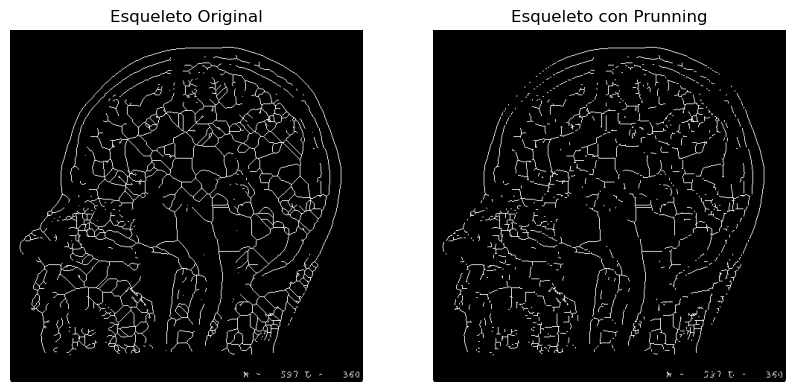

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt
from skimage.morphology import thin, remove_small_objects

# imagen binaria
image = io.imread("Images/brain-scan.jpeg", as_gray=True)

# Umbralización para convertir en imagen binaria
thresh = threshold_otsu(image)
binary = image > thresh

skeleton = morphology.skeletonize(binary)

# Aplicar un adelgazamiento del esqueleto
pruned_skeleton = remove_small_objects(skeleton, min_size=2)  # Elimina ramas pequeñas

# Mostrar comparación
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(skeleton, cmap="gray")
axes[0].set_title("Esqueleto Original")
axes[1].imshow(pruned_skeleton, cmap="gray")
axes[1].set_title("Esqueleto con Prunning")

for ax in axes:
    ax.axis("off")

plt.show()